Bird: Mourning Dove

https://www.pwrc.usgs.gov/bbs/RawData/

https://science.ebird.org/en/status-and-trends/species/moudov/abundance-map-weekly?week=1

# Part A: Exploratory Analysis and Data cleanup
Starting with the Mourning dove dataset, then gas emissions, then combining them.
Set working directory to where mourningdove.csv and fulldata.csv are located.

In [10]:
import pandas as pd

doves = pd.read_csv("mourningdove.csv")
doves

,Country,State,Route,Year,Aou,SpeciesTotal
0,124.0,4.0,1.0,1990.0,3160.0,7.0
1,124.0,4.0,1.0,1991.0,3160.0,32.0
2,124.0,4.0,1.0,1992.0,3160.0,1.0
3,124.0,4.0,1.0,1993.0,3160.0,2.0
4,124.0,4.0,1.0,1994.0,3160.0,5.0
...,...,...,...,...,...,...
76660,840.0,92.0,901.0,2018.0,3160.0,1.0
76661,840.0,92.0,902.0,2004.0,3160.0,25.0
76662,840.0,92.0,902.0,2006.0,3160.0,13.0
76663,840.0,92.0,902.0,2015.0,3160.0,2.0


In [11]:
# Grouping by State, ignoring individual routes and aggregating them to state level
doves_grouped = doves.groupby(['State', 'Year'], as_index=False)['SpeciesTotal'].sum()
doves_grouped.head()

,State,Year,SpeciesTotal
0,2.0,1990.0,1891.0
1,2.0,1991.0,1802.0
2,2.0,1992.0,1776.0
3,2.0,1993.0,2127.0
4,2.0,1994.0,2098.0


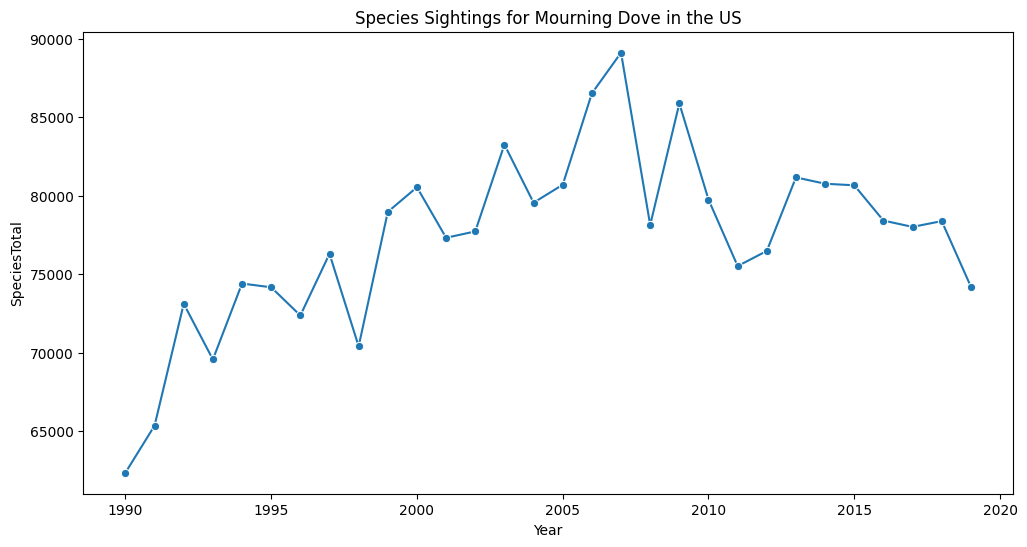

In [12]:
# Visualizing our data 
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
sns.lineplot(data=doves.groupby(['Year'], as_index=False)['SpeciesTotal'].sum(), x="Year", y="SpeciesTotal", marker="o")
plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesTotal", fontsize=10)
plt.show()

The metadata defines each state: 

'''
02,Alabama; 03,Alaska; 04,Alberta; 06,Arizona; 07,Arkansas; 11,British Columbia; 14,California; 17,Colorado; 18,Connecticut; 21,Delaware; 25,Florida; 27,Georgia; 33,Idaho; 34,Illinois; 35,Indiana; 36,Iowa; 38,Kansas; 39,Kentucky; 42,Louisiana; 43,Northwest Territories; 44,Maine; 45,Manitoba; 46,Maryland; 47,Massachusetts; 49,Michigan; 50,Minnesota; 51,Mississippi; 52,Missouri; 53,Montana; 54,Nebraska; 55,Nevada; 56,New Brunswick; 57,Newfoundland and Labrador; 58,New Hampshire; 59,New Jersey; 60,New Mexico; 61,New York; 62,Nunavut; 63,North Carolina; 64,North Dakota; 65,Nova Scotia; 66,Ohio; 67,Oklahoma; 68,Ontario; 69,Oregon; 72,Pennsylvania; 75,Prince Edward Island; 76,Quebec; 77,Rhode Island; 79,Saskatchewan; 80,South Carolina; 81,South Dakota; 82,Tennessee; 83,Texas; 85,Utah; 87,Vermont; 88,Virginia; 89,Washington; 90,West Virginia; 91,Wisconsin; 92,Wyoming; 93,Yukon
'''

We will use, for now, 07 Arkansas, 34 Illinois, 52 Missouri.

In [13]:
# mapping state code to name
state_code_to_name = {
    2: "Alabama", 3: "Alaska", 4: "Alberta", 6: "Arizona", 7: "Arkansas", 11: "British Columbia",
    14: "California", 17: "Colorado", 18: "Connecticut", 21: "Delaware", 25: "Florida", 27: "Georgia",
    33: "Idaho", 34: "Illinois", 35: "Indiana", 36: "Iowa", 38: "Kansas", 39: "Kentucky", 42: "Louisiana",
    43: "Northwest Territories", 44: "Maine", 45: "Manitoba", 46: "Maryland", 47: "Massachusetts",
    49: "Michigan", 50: "Minnesota", 51: "Mississippi", 52: "Missouri", 53: "Montana", 54: "Nebraska",
    55: "Nevada", 56: "New Brunswick", 57: "Newfoundland and Labrador", 58: "New Hampshire",
    59: "New Jersey", 60: "New Mexico", 61: "New York", 62: "Nunavut", 63: "North Carolina",
    64: "North Dakota", 65: "Nova Scotia", 66: "Ohio", 67: "Oklahoma", 68: "Ontario", 69: "Oregon",
    72: "Pennsylvania", 75: "Prince Edward Island", 76: "Quebec", 77: "Rhode Island",
    79: "Saskatchewan", 80: "South Carolina", 81: "South Dakota", 82: "Tennessee", 83: "Texas",
    85: "Utah", 87: "Vermont", 88: "Virginia", 89: "Washington", 90: "West Virginia",
    91: "Wisconsin", 92: "Wyoming", 93: "Yukon"
}

# Filter only for rows where the state code exists in the mapping
doves_state = doves_grouped[doves_grouped["State"].isin(state_code_to_name.keys())]

# Map numeric codes to state/province names
doves_state['State'] = doves_state['State'].map(state_code_to_name)

doves_state.head(3)


,State,Year,SpeciesTotal
0,Alabama,1990.0,1891.0
1,Alabama,1991.0,1802.0
2,Alabama,1992.0,1776.0


In [14]:
# Finding states with high overall abundance
state_totals = doves_state.groupby("State")["SpeciesTotal"].sum().reset_index()
state_totals = state_totals.sort_values(by="SpeciesTotal", ascending=False)
high_count_states = state_totals[state_totals["SpeciesTotal"] > 20000]["State"]
df_high = doves_state[doves_state["State"].isin(high_count_states[3:])]
state_totals

,State,SpeciesTotal
50,Texas,207804.0
15,Kansas,109025.0
12,Illinois,100475.0
6,Colorado,99360.0
9,Florida,88857.0
35,North Carolina,81071.0
5,California,75061.0
42,Pennsylvania,74418.0
27,Nebraska,73918.0
38,Ohio,66190.0


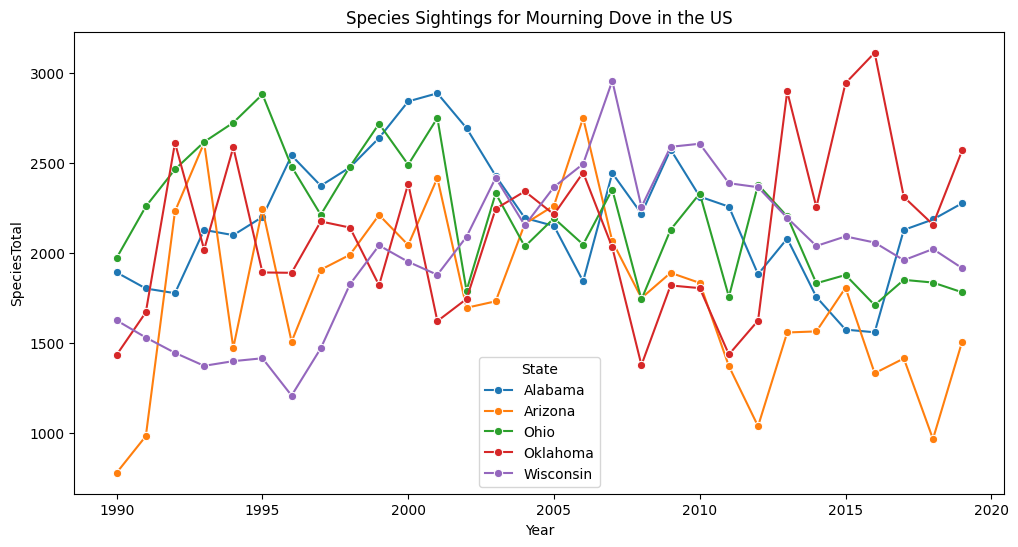

In [15]:
# Visualizing our data 

#states = [ 'Ohio','Alabama', 'Oklahoma', 'Arizona',]
#states = [ 'Ohio','Alabama', 'Oklahoma', 'Wisconsin',]
#states = df_high['State'].unique()
#states = [ 'Oklahoma', 'Wisconsin',] #Ohio
chosen_states = [ 'Ohio','Alabama', 'Oklahoma', 'Wisconsin','Arizona']

doves_states_chosen = doves_state[doves_state["State"].isin(chosen_states)]

plt.figure(figsize=(12,6))
sns.lineplot(data=doves_states_chosen, x="Year", y="SpeciesTotal", hue="State", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesTotal", fontsize=10)
plt.show()

Now comparing mourning dove with emission types

In [16]:
import pandas as pd

df_emissions = pd.read_csv("full_data.csv")
df_emissions.rename(columns={'Region': 'State', 'Value': 'Emissions'}, inplace=True)

df_emissions = df_emissions[df_emissions["State"].isin([state.replace(' ', '_') for state in chosen_states])]

df_emissions_pivoted = df_emissions.pivot_table(index=["State", "Year"], columns="Emission Type", values="Emissions").reset_index()
df_emissions_pivoted.columns.name = None  # removes 'Emission Type' as the columns' name
df_emissions_pivoted


,State,Year,Carbon dioxide,Fluorinated gases,Gross total,Land use and forestry carbon stock change,Methane,Net total,Nitrous oxide
0,Alabama,1990,109.459874,4.975341,149.387626,-55.825972,31.651450,94.689057,4.428363
1,Alabama,1991,113.052795,5.319994,152.421264,-55.420261,30.465628,98.139711,4.721555
2,Alabama,1992,119.414117,5.704824,157.596718,-55.622386,28.942480,103.150159,4.711124
3,Alabama,1993,124.578531,6.013118,160.560890,-55.972732,26.448053,105.868105,4.801134
4,Alabama,1994,123.212076,6.513821,162.157620,-55.739611,28.718976,107.865923,5.160662
...,...,...,...,...,...,...,...,...,...
160,Wisconsin,2018,102.291864,2.824717,130.722936,-23.393974,17.218611,110.624722,11.683504
161,Wisconsin,2019,95.603438,2.863185,122.784683,-23.371439,16.903371,102.728172,10.729618
162,Wisconsin,2020,87.889697,2.758967,114.639833,-22.399979,16.895004,95.443378,10.299689
163,Wisconsin,2021,93.554029,2.820550,120.589520,-22.693423,17.080057,101.164020,10.402808


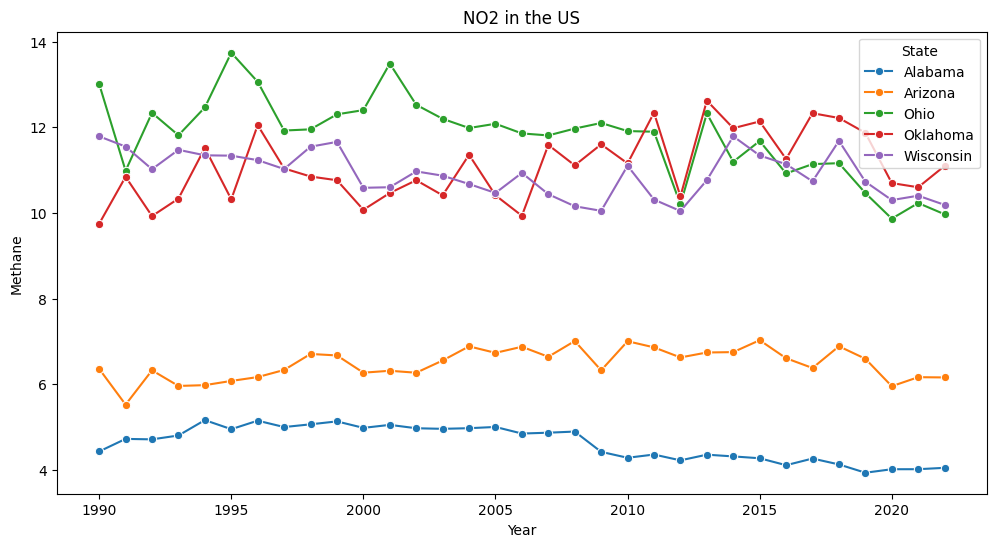

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_emissions_pivoted, x="Year", y="Nitrous oxide", hue="State", marker="o")

plt.title("NO2 in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Methane", fontsize=10)
plt.show()

In [18]:
doves_states_chosen['State'] = doves_states_chosen['State'].str.replace(' ', '_')
df_combined = pd.merge(doves_states_chosen, df_emissions_pivoted, on=['State', 'Year'], how='left')
df_combined = df_combined.drop(columns=['Gross total', 'Net total'])
df_combined.columns = df_combined.columns.str.replace(' ', '_')

df_combined

/var/folders/99/frq78g2d2qsdnc0tn6nrkg900000gn/T/ipykernel_78766/4236984653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doves_states_chosen['State'] = doves_states_chosen['State'].str.replace(' ', '_')


,State,Year,SpeciesTotal,Carbon_dioxide,Fluorinated_gases,Land_use_and_forestry_carbon_stock_change,Methane,Nitrous_oxide
0,Alabama,1990.0,1891.0,109.459874,4.975341,-55.825972,31.651450,4.428363
1,Alabama,1991.0,1802.0,113.052795,5.319994,-55.420261,30.465628,4.721555
2,Alabama,1992.0,1776.0,119.414117,5.704824,-55.622386,28.942480,4.711124
3,Alabama,1993.0,2127.0,124.578531,6.013118,-55.972732,26.448053,4.801134
4,Alabama,1994.0,2098.0,123.212076,6.513821,-55.739611,28.718976,5.160662
...,...,...,...,...,...,...,...,...
145,Wisconsin,2015.0,2091.0,100.757915,3.196272,-23.049184,16.567310,11.341810
146,Wisconsin,2016.0,2057.0,96.618345,3.019417,-23.306842,17.041917,11.138244
147,Wisconsin,2017.0,1959.0,99.481316,3.213225,-23.188085,17.170417,10.738654
148,Wisconsin,2018.0,2021.0,102.291864,2.824717,-23.393974,17.218611,11.683504


Let's look at one state. Let's choose Wisconsin for now:

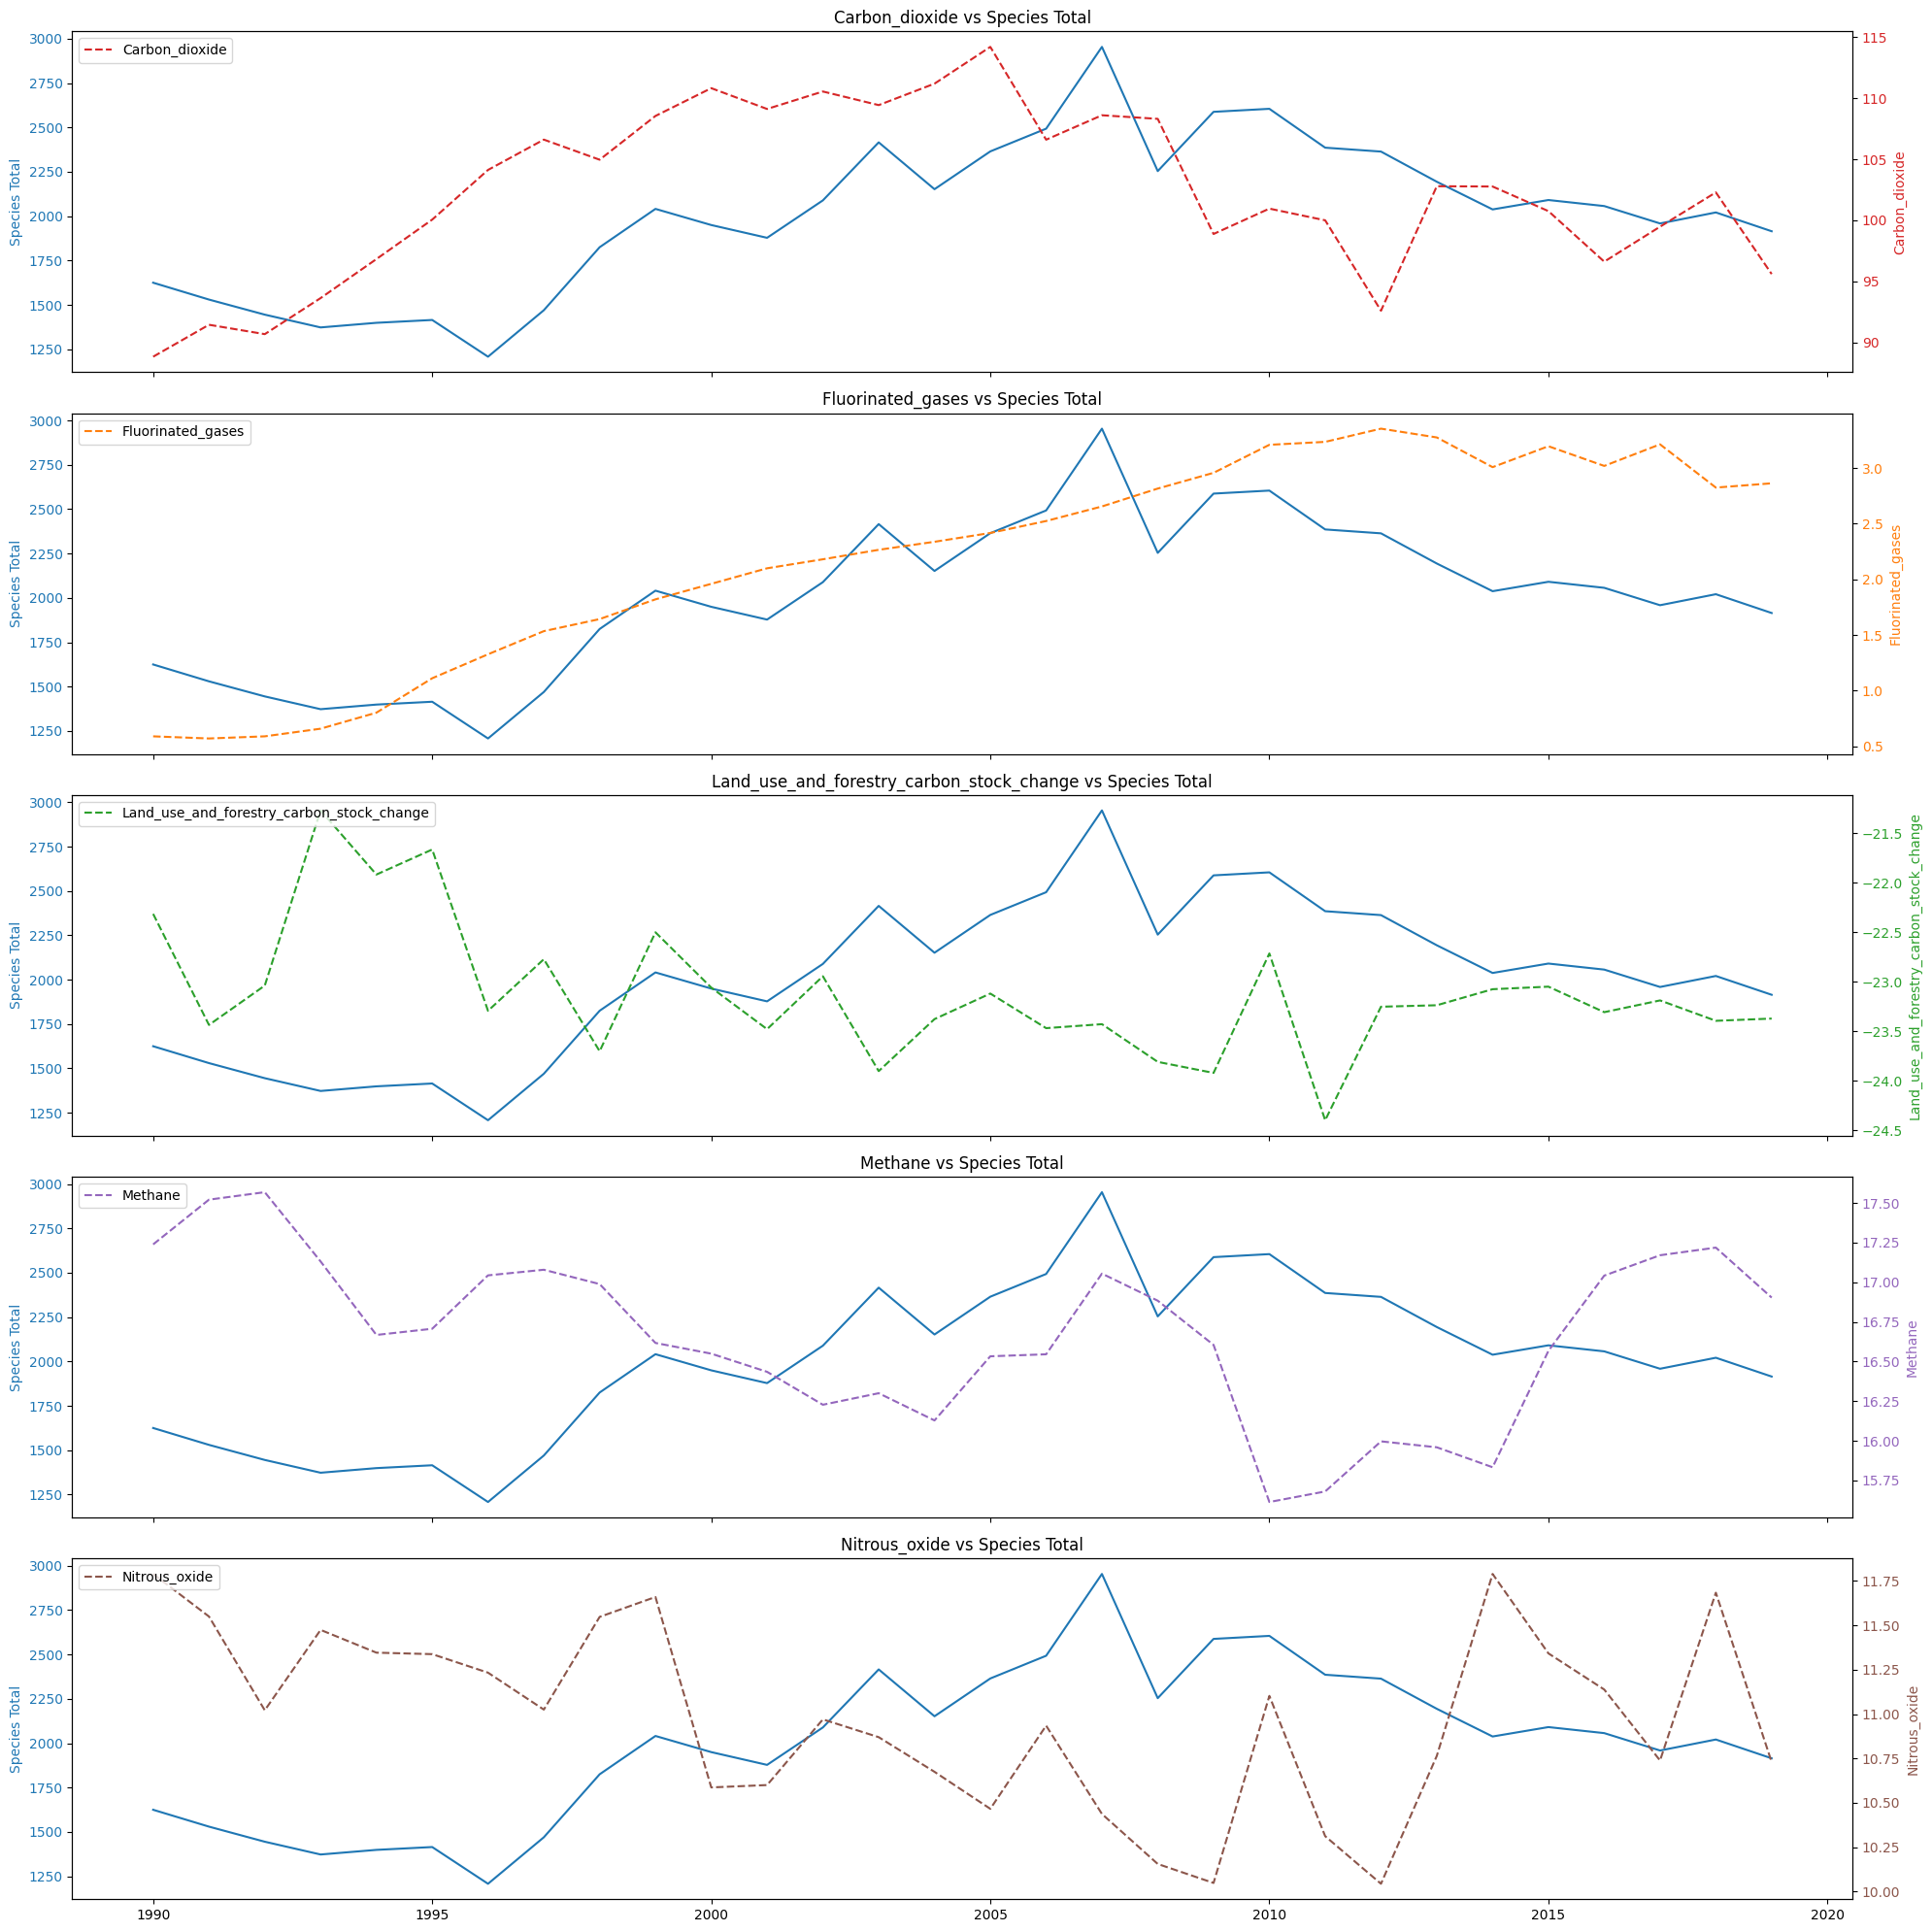

In [19]:
import matplotlib.pyplot as plt

state_data = df_combined[df_combined['State'] == 'Wisconsin']

fig, axes = plt.subplots(5, 1, figsize=(20, 20), sharex=True)

emission_types = ['Carbon_dioxide', 'Fluorinated_gases', 'Land_use_and_forestry_carbon_stock_change', 
                  'Methane', 'Nitrous_oxide']

colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:brown']

for i, emission in enumerate(emission_types):
    ax = axes[i]  
    
    # species
    ax.set_ylabel('Species Total', color='tab:blue')
    ax.plot(state_data['Year'], state_data['SpeciesTotal'], color='tab:blue', label='Species Total')
    
    # emission type
    ax2 = ax.twinx()  
    ax2.set_ylabel(emission, color=colors[i])
    ax2.plot(state_data['Year'], state_data[emission], color=colors[i], label=emission, linestyle='--')
    
    # key
    ax.set_title(f'{emission} vs Species Total')
    ax.tick_params(axis='y', labelcolor='tab:blue') 
    ax2.tick_params(axis='y', labelcolor=colors[i])  
    ax2.legend(loc='upper left')

fig.tight_layout() 
plt.xlabel('Year')
plt.show()


# Part B: Analysis

Let's take a closer look at the distribution of the data.

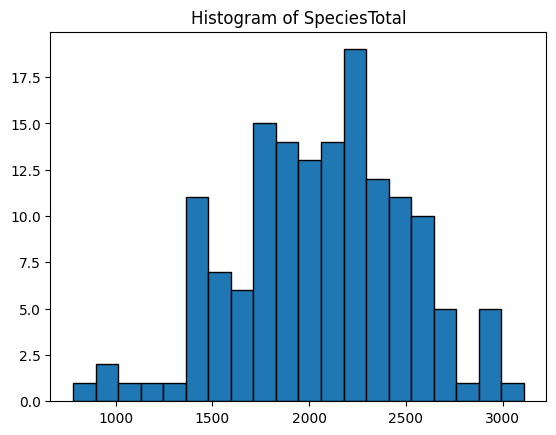

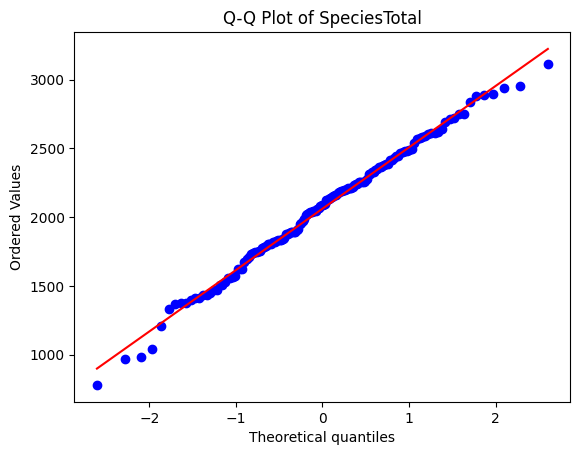

In [20]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram
plt.hist(df_combined["SpeciesTotal"], bins=20, edgecolor="k")
plt.title("Histogram of SpeciesTotal")
plt.show()

# QQ Plot
stats.probplot(df_combined["SpeciesTotal"], dist="norm", plot=plt)
plt.title("Q-Q Plot of SpeciesTotal")
plt.show()


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.670
Date:                Fri, 09 May 2025   Prob (F-statistic):           9.63e-06
Time:                        01:16:40   Log-Likelihood:                -1104.5
No. Observations:                 150   AIC:                             2231.
Df Residuals:                     139   BIC:                             2264.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

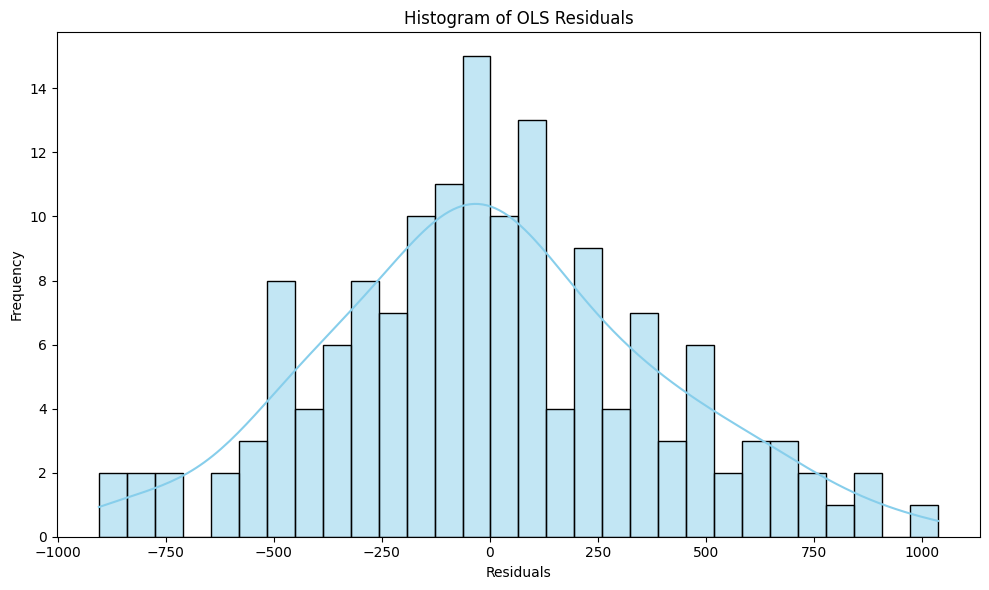

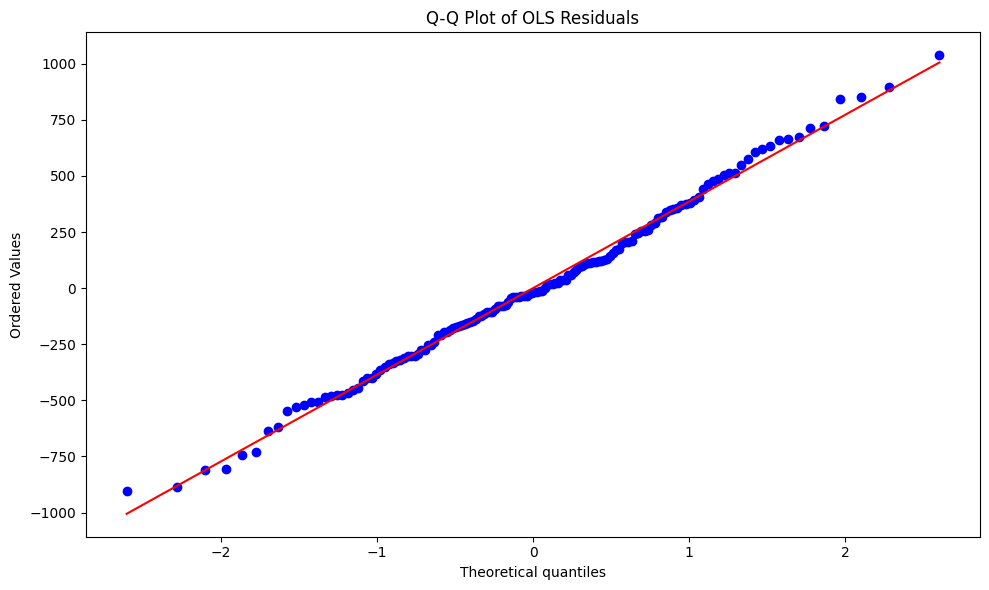

Shapiro-Wilk Test statistic: 0.9936, p-value: 0.7469


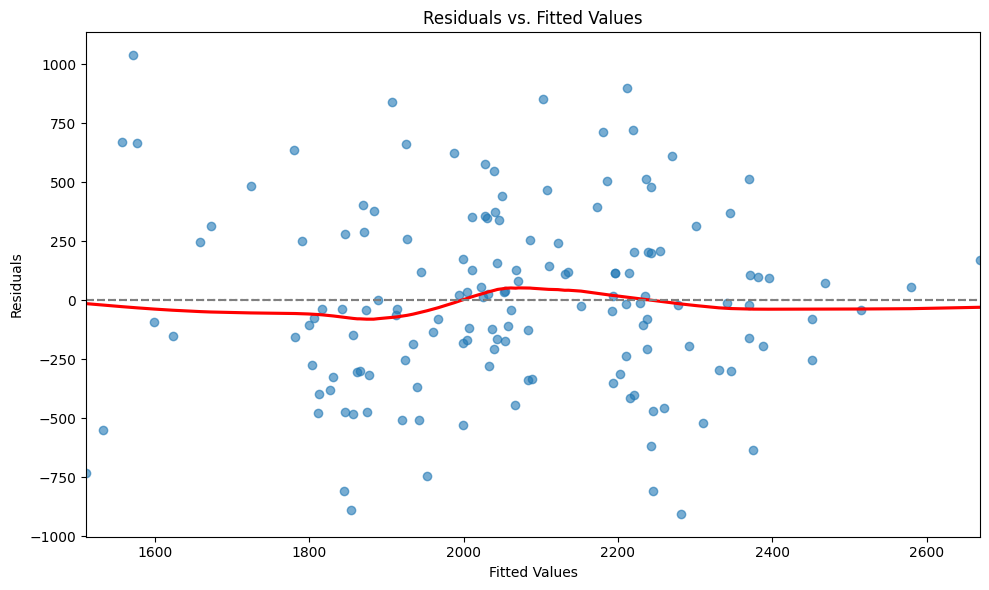

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


# Fit the model
formula = "SpeciesTotal ~ Carbon_dioxide + Fluorinated_gases + Land_use_and_forestry_carbon_stock_change + Methane + Nitrous_oxide + C(State) + Year"
model = smf.ols(formula, data=df_combined)
results = model.fit()

print(results.summary())

residuals = results.resid
fitted = results.fittedvalues

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Histogram of OLS Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# QQ 
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of OLS Residuals')
plt.tight_layout()
plt.show()

# Shapiro-Wilk  (normality)
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test statistic: {stat:.4f}, p-value: {p_value:.4g}")

# Residuals vs. Fitted plot
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.tight_layout()
plt.show()
